In [1]:
from classes.Settings import Settings
from classes.Devices import Devices
from classes.Nodes import Nodes
from classes.Resistors import Resistors
from classes.VoltageSources import VoltageSources
from classes.CurrentSources import CurrentSources
from classes.VoltageSources import CurrentSensors
from classes.Inductors import Inductors
from classes.Capacitors import Capacitors
from lib.solve import solve
from matplotlib import pyplot as plt 
from lib.parse_json import parse_json

# Capacitor

Autogenerating nodes...
Circuit has 4 nodes
Total Y matrix size for circuit will be 9


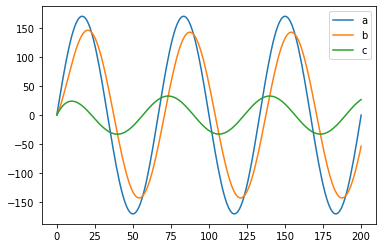

In [2]:
devices = Devices([
    VoltageSources("vs-gnd-a", "a", "gnd", 120, 0, 15),
    Resistors("r-1", "a", "b", 5),
    Capacitors("c-1", "b", "c", 0.001),
    Resistors("r-2", "c", "gnd", 2.5)
])

results = solve(devices, Settings(simulationTime=0.2))

v_a = results.get_node_voltage("a")
v_b = results.get_node_voltage("b")
v_c = results.get_node_voltage("c")

x = range(len(v_a))

plt.plot(x, v_a, label="a")
plt.plot(x, v_b, label="b")
plt.plot(x, v_c, label="c")
plt.legend()
plt.show()


# Inductor

Autogenerating nodes...
Circuit has 4 nodes
Total Y matrix size for circuit will be 7


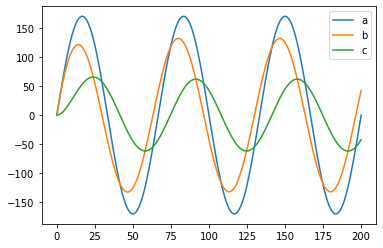

In [3]:
devices = Devices([
    VoltageSources("vs-gnd-a", "a", "gnd", 120, 0, 15),
    Resistors("r-1", "a", "b", 5),
    Inductors("c-1", "b", "c", 0.1),
    Resistors("r-2", "c", "gnd", 5)
])

results = solve(devices, Settings(simulationTime=0.2))

v_a = results.get_node_voltage("a")
v_b = results.get_node_voltage("b")
v_c = results.get_node_voltage("c")

x = range(len(v_a))

plt.plot(x, v_a, label="a")
plt.plot(x, v_b, label="b")
plt.plot(x, v_c, label="c")
#plt.plot(x, v_c_gnd, label="d")
plt.legend()
plt.show()


# RL Circuit Phase a

Circuit has 3 nodes
Total Y matrix size for circuit will be 6


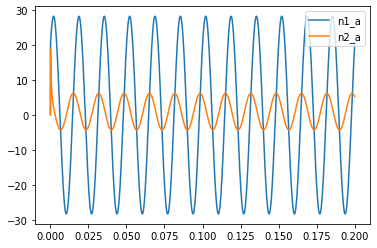

In [4]:
devices = parse_json('testcases/single_phase_RL_circuit.json')

settings = Settings(simulationTime=0.2, timestep=0.0001)
results = solve(devices, settings)

def plotNode(phase):
    waveforms = [
        (results.get_node_voltage(f'n1_a'), "n1_a"),
        (results.get_node_voltage(f'n2_a'), "n2_a")
    ]

    x = results.get_timesteps()

    plt.clf()

    count = 1
    for (waveform, label) in waveforms:
        plt.plot(x, waveform, label=label)
        count += 1

    plt.legend()
    plt.show()

plotNode('a')